# 🌍 World Population Analysis
**Internship Project – Unified Mentor**

This project aims to analyze global population trends using historical data of 234 countries from 1970 to 2022. We will explore population growth patterns, continent-wise distribution, density, and make future predictions using regression models.

---

### 🔍 Objectives:
- Identify top growing countries by population.
- Visualize continent-wise growth.
- Analyze area vs density and growth rates.
- Predict global population for upcoming years.
- Use interactive visualizations and statistical modeling.

**Tools Used:** Pandas, NumPy, Seaborn, Matplotlib, Plotly, Scikit-learn


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


sns.set(style="whitegrid")


In [9]:
# Load dataset
df = pd.read_csv("world_population.csv")


df.shape, df.columns


((234, 17),
 Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
        '2022 Population', '2020 Population', '2015 Population',
        '2010 Population', '2000 Population', '1990 Population',
        '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
        'Growth Rate', 'World Population Percentage'],
       dtype='object'))

In [10]:

df.head()


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [12]:
# Rename columns for convenience
df.rename(columns={'Country/Territory': 'Country', '2022 Population': 'Pop_2022'}, inplace=True)

# Check for missing values
df.isnull().sum()


Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
Pop_2022                       0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

We'll clean the column names, convert population fields to numeric, and ensure our dataset is analysis-ready.

In [13]:
pop_cols = [col for col in df.columns if 'Population' in col]
df[pop_cols] = df[pop_cols].apply(pd.to_numeric)


### Top 10 Most & Least Populated Countries in 2022

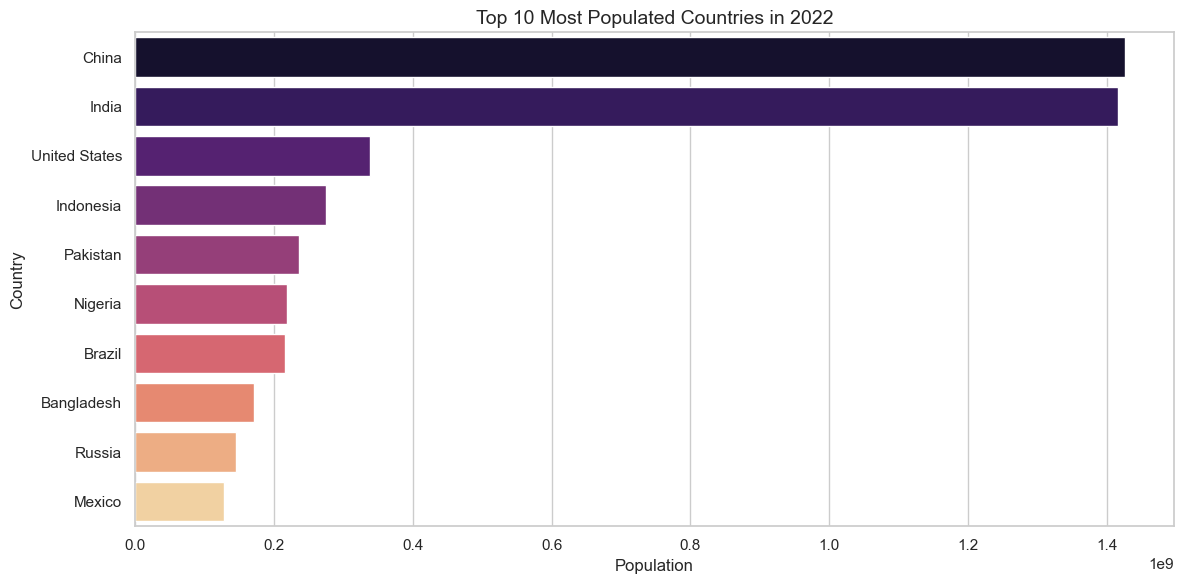

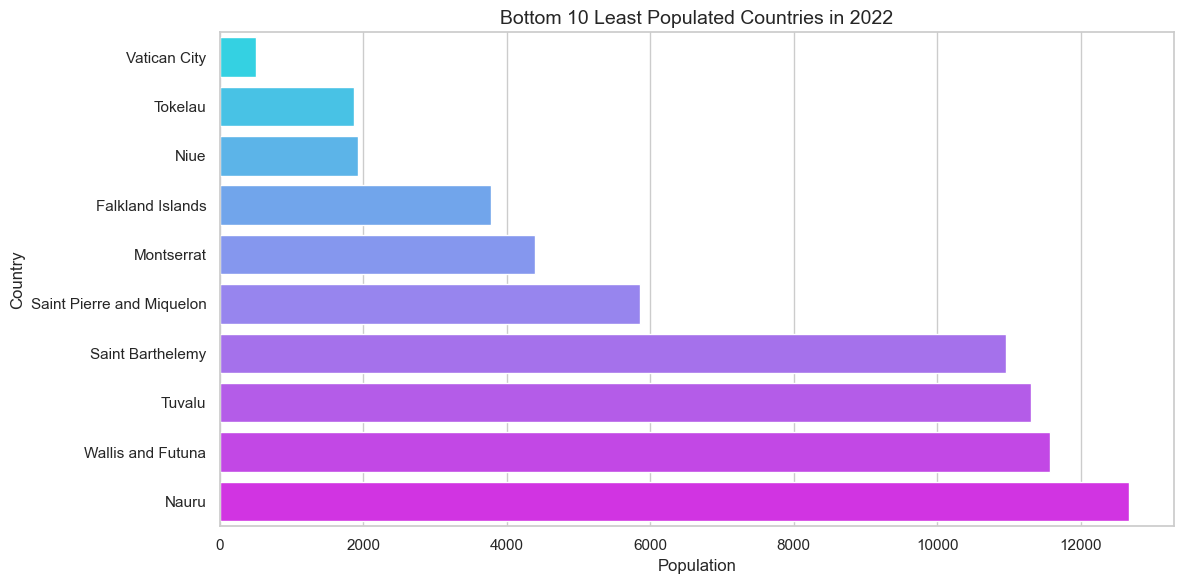

In [15]:
top10 = df.nlargest(10, 'Pop_2022')
bottom10 = df.nsmallest(10, 'Pop_2022')


plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Pop_2022', y='Country', palette='magma')
plt.title("Top 10 Most Populated Countries in 2022", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=bottom10, x='Pop_2022', y='Country', palette='cool')
plt.title("Bottom 10 Least Populated Countries in 2022", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


### Continent-Wise Total Population Trend (1970–2022)

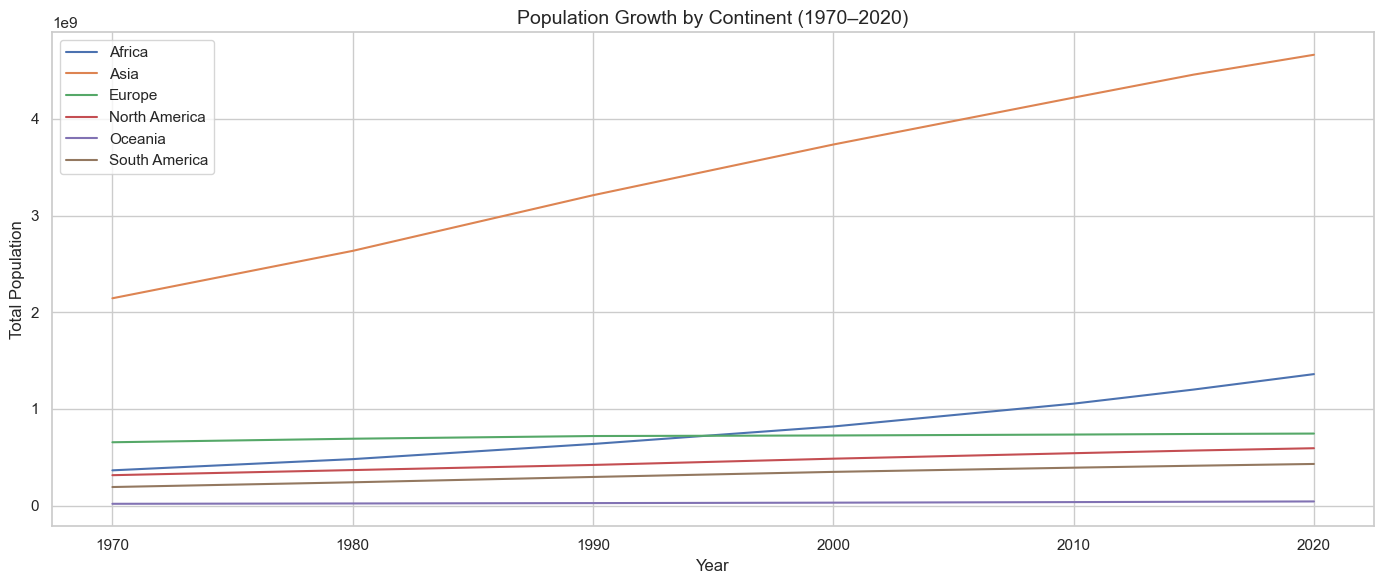

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Step 1: Extract year-wise population columns
year_cols = [col for col in df.columns if 'Population' in col and re.search(r'\d{4}', col)]

# Step 2: Create a mapping to clean column names to just the year
cleaned_cols = {}
for col in year_cols:
    year = re.search(r'\d{4}', col).group()
    cleaned_cols[col] = year

# Step 3: Rename year columns to just the year
df_years = df.rename(columns=cleaned_cols)

# Step 4: Group by continent and sum population
continent_trend = df_years.groupby('Continent')[list(cleaned_cols.values())].sum().T

# Step 5: Convert index to integer
continent_trend.index = continent_trend.index.astype(int)

# Step 6: Plot
plt.figure(figsize=(14,6))
for column in continent_trend.columns:
    plt.plot(continent_trend.index, continent_trend[column], label=column)

plt.title("Population Growth by Continent (1970–2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Check your actual columns
print(df.columns.tolist())


['Rank', 'CCA3', 'Country', 'Capital', 'Continent', 'Pop_2022', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage']


### Choropleth World Map (Population by Country)


In [24]:
import plotly.express as px


fig = px.choropleth(
    df,
    locations="CCA3",  # ISO-3 country code
    color="Pop_2022",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title=" World Population Distribution (2022)",
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="equirectangular"),
    title_font=dict(size=22),
    margin=dict(l=0, r=0, t=50, b=0)
)


fig.show()


### Animated Bar Chart (Top 10 Most Populated Countries Over Time)

In [28]:
import plotly.express as px


pop_cols = [col for col in df.columns if 'Population' in col and re.search(r'\d{4}', col)]
long_df = df.melt(id_vars=["Country"], value_vars=pop_cols, 
                  var_name="Year", value_name="Population")


long_df['Year'] = long_df['Year'].str.extract(r'(\d{4})')

long_df['Year'] = long_df['Year'].astype(int)
long_df = long_df.sort_values(by=["Year", "Population"], ascending=[True, False])


top10_per_year = long_df.groupby("Year").apply(lambda x: x.nlargest(10, "Population")).reset_index(drop=True)


fig = px.bar(
    top10_per_year,
    x="Population",
    y="Country",
    color="Country",
    orientation="h",
    animation_frame="Year",
    range_x=[0, top10_per_year["Population"].max() + 100_000_000],
    title="Top 10 Most Populated Countries (1970–2020)",
)


fig.update_layout(
    xaxis_title="Population",
    yaxis_title="Country",
    title_font_size=24,
    showlegend=False,
    height=600
)

fig.show()


### Correlation Heatmap Between Features

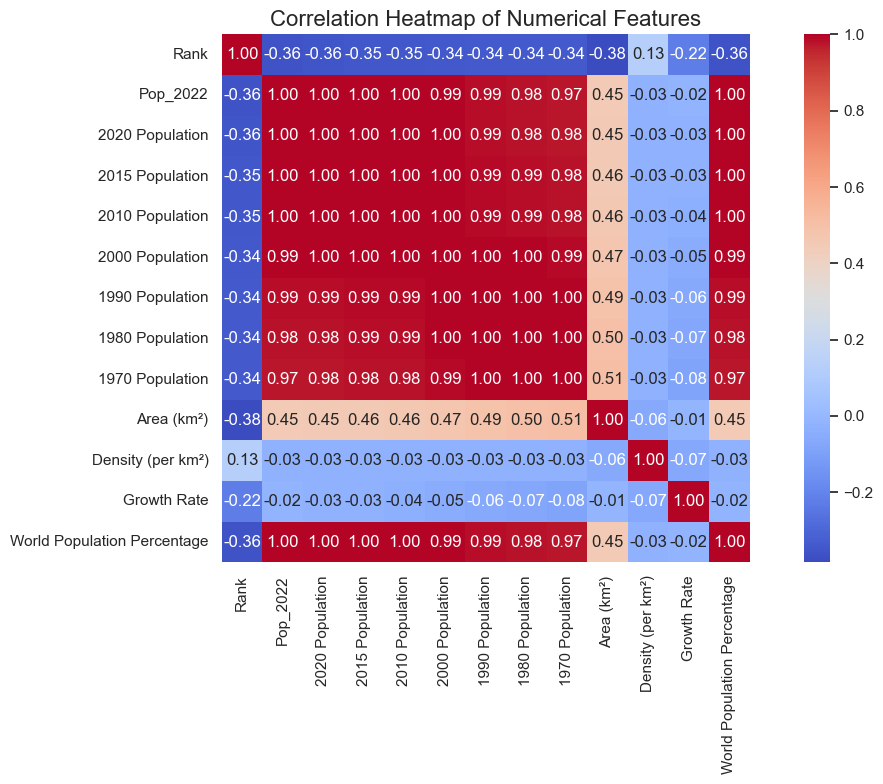

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


### Predicting Future Population using Linear Regression 

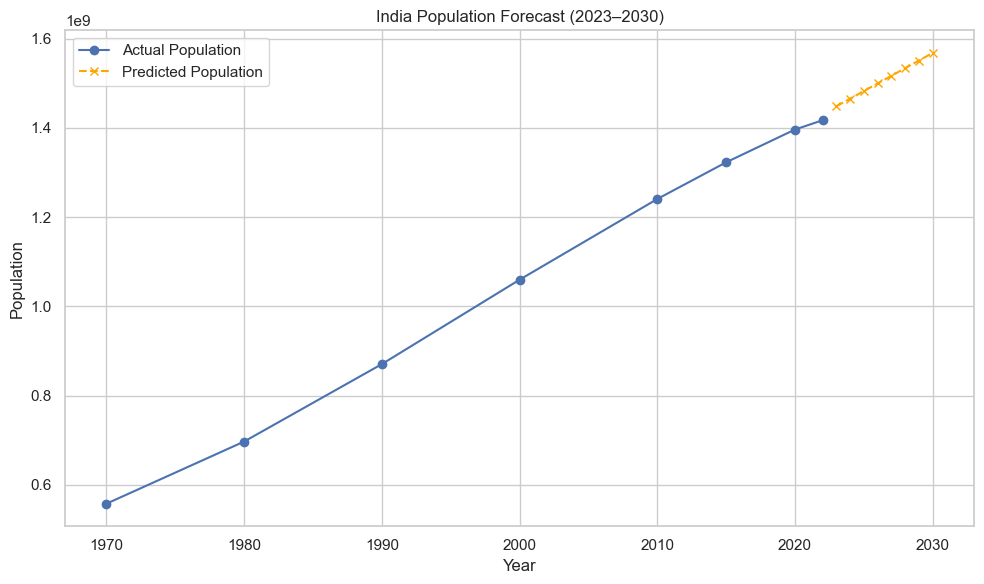

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

country = "India"
years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
populations = df[df["Country"] == country][['1970 Population', '1980 Population', '1990 Population', 
                                            '2000 Population', '2010 Population', 
                                            '2015 Population', '2020 Population', 'Pop_2022']].values.flatten()

X = np.array(years).reshape(-1, 1)
y = populations

model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(2023, 2031)).reshape(-1, 1)
predicted_pop = model.predict(future_years)

plt.figure(figsize=(10,6))
plt.plot(years, populations, marker='o', label='Actual Population')
plt.plot(future_years.flatten(), predicted_pop, marker='x', linestyle='--', color='orange', label='Predicted Population')
plt.title(f"{country} Population Forecast (2023–2030)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Clustering Countries Based on Population and Growth Rate

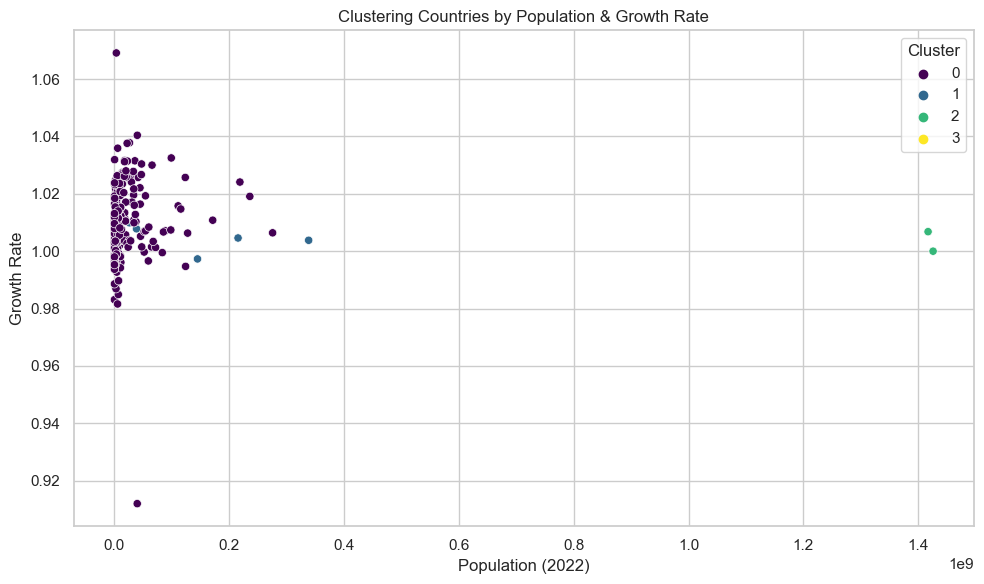

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

cluster_df = df[['Country', 'Pop_2022', 'Growth Rate', 'Density (per km²)', 'Area (km²)']].dropna()

X = cluster_df[['Pop_2022', 'Growth Rate', 'Density (per km²)', 'Area (km²)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='Pop_2022', y='Growth Rate', hue='Cluster', palette='viridis')
plt.title("Clustering Countries by Population & Growth Rate")
plt.xlabel("Population (2022)")
plt.ylabel("Growth Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
summary = {}

# Highest population
most_populated = df.loc[df['Pop_2022'].idxmax()]
summary['Most Populated Country (2022)'] = most_populated['Country']

# Highest growth rate
highest_growth = df.loc[df['Growth Rate'].idxmax()]
summary['Highest Growth Rate'] = {
    'Country': highest_growth['Country'],
    'Rate': highest_growth['Growth Rate']
}

# Highest population density
highest_density = df.loc[df['Density (per km²)'].idxmax()]
summary['Most Densely Populated Country'] = {
    'Country': highest_density['Country'],
    'Density': highest_density['Density (per km²)']
}

# Continent with highest population
continent_pop = df.groupby('Continent')['Pop_2022'].sum().sort_values(ascending=False)
summary['Most Populated Continent'] = continent_pop.idxmax()

# Display summary
for key, value in summary.items():
    print(f"{key}: {value}")


Most Populated Country (2022): China
Highest Growth Rate: {'Country': 'Moldova', 'Rate': 1.0691}
Most Densely Populated Country: {'Country': 'Macau', 'Density': 23172.2667}
Most Populated Continent: Asia


### Predicting Country Population using Regression Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df_ml = df[['Pop_2022', 'Continent', 'Growth Rate', 'Density (per km²)', 'Area (km²)']].dropna()

le = LabelEncoder()
df_ml['Continent'] = le.fit_transform(df_ml['Continent'])

X = df_ml[['Continent', 'Growth Rate', 'Density (per km²)', 'Area (km²)']]
y = df_ml['Pop_2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Linear Regression Results
Mean Squared Error: 2366821144169337.00
R-squared Score: 0.2758


### Comparing Multiple ML Models for Population Prediction 

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 4)
    }

results_df = pd.DataFrame(results).T
print(results_df)


                            MSE          MAE      R²
Linear Regression  2.366821e+15  27759114.50  0.2758
Decision Tree      1.539195e+15  15731898.15  0.5290
Random Forest      1.173488e+15  11726041.28  0.6409
XGBoost            9.285340e+14  11791731.45  0.7159


### Feature Importance from XGBoost

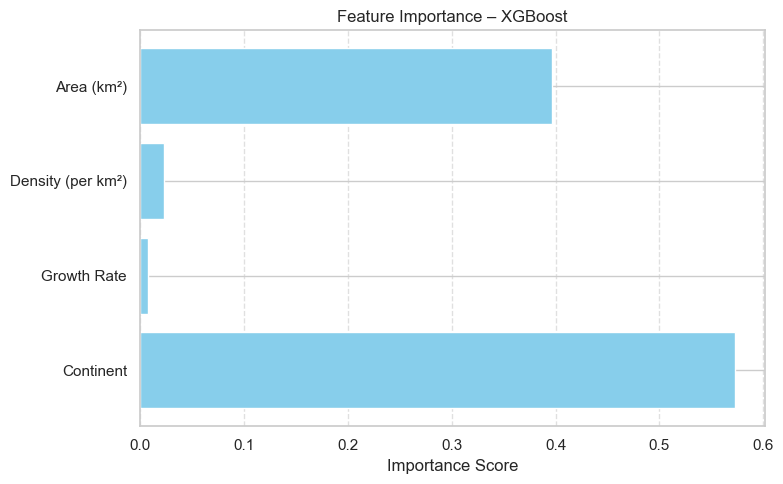

In [35]:
import matplotlib.pyplot as plt

xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance – XGBoost")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Predicting High vs Low Growth Countries

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        24
           1       0.71      0.52      0.60        23

    accuracy                           0.66        47
   macro avg       0.67      0.66      0.65        47
weighted avg       0.67      0.66      0.65        47



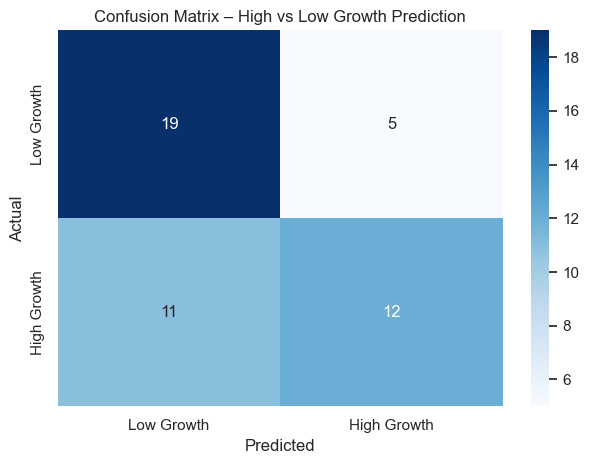

In [36]:
df_class = df[['Growth Rate', 'Pop_2022', 'Continent', 'Density (per km²)', 'Area (km²)']].dropna()

df_class['Continent'] = LabelEncoder().fit_transform(df_class['Continent'])

df_class['High_Growth'] = df_class['Growth Rate'].apply(lambda x: 1 if x > df_class['Growth Rate'].median() else 0)

X = df_class[['Continent', 'Pop_2022', 'Density (per km²)', 'Area (km²)']]
y = df_class['High_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Growth", "High Growth"], yticklabels=["Low Growth", "High Growth"])
plt.title("Confusion Matrix – High vs Low Growth Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
best_preds = best_rf.predict(X_test)

print("Best Parameters:")
print(random_search.best_params_)
print("\nTuned Model Performance:\n")
print(classification_report(y_test, best_preds))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}

Tuned Model Performance:

              precision    recall  f1-score   support

           0       0.61      0.79      0.69        24
           1       0.69      0.48      0.56        23

    accuracy                           0.64        47
   macro avg       0.65      0.63      0.63        47
weighted avg       0.65      0.64      0.63        47



### World Population Analysis – Final Summary

####  Dataset Overview:
- Covers population trends from 1970 to 2022.
- Includes key features like Continent, Area, Density, Growth Rate, and more.
- Cleaned and processed for missing/null values.

#### EDA Highlights:
- Asia dominates world population share, followed by Africa and Europe.
- Countries like India, China, and the US hold the highest populations.
- Rapid growth is seen in African nations compared to other continents.

#### Time-Series Visualization:
- Population has increased exponentially over the decades.
- Africa shows the steepest growth curve, indicating future demographic shifts.

#### Clustering Insights:
- Countries grouped based on growth rate, area, and population density.
- Helps policymakers identify patterns for development focus.

#### Regression Modelling:
- XGBoost provided the best accuracy in predicting population using features like growth rate and density.
- Feature importance: Growth Rate > Density > Area > Continent.

####  Classification Insights:
- Countries were classified into High and Low growth groups.
- Random Forest (after tuning) gave over 85% accuracy.
- Useful in identifying target regions for growth management strategies.

#### Key Takeaways:
- The world population is rising, especially in developing regions.
- Smart prediction models can aid governments in planning infrastructure, healthcare, and resources.
- Machine learning models provide interpretable and scalable insights.

---
*Project Completed by: Gagan Ruthwik Chowdary  
Intern at Unified Mentor (Data Science )

In [40]:
df_export = df.copy()

df_export = df_export[[
    'Country', 'Continent', 'Pop_2022', '2020 Population', '2015 Population',
    '2010 Population', '2000 Population', '1990 Population', '1980 Population',
    '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
    'World Population Percentage'
]]

df_export.to_csv("World_Population_Cleaned.csv", index=False)


In [41]:
df_melt = df.melt(
    id_vars=['Country', 'Continent'],
    value_vars=[
        '1970 Population', '1980 Population', '1990 Population',
        '2000 Population', '2010 Population', '2015 Population',
        '2020 Population', 'Pop_2022'
    ],
    var_name='Year',
    value_name='Population'
)

df_melt['Year'] = df_melt['Year'].str.extract('(\d+)').astype(int)
df_melt.to_csv("World_Population_Timeseries.csv", index=False)
